# February Assignment model answer

This can be distributed to students as a model answer but not until 5th week please, so students have to try by themself first!

In [3]:
#Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
sns.set_theme()
sns.set_style('white')

## Question 1 - Cloud seeding

*a)  Download the data file and load the data into a `Pandas` dataframe called `clouds`*

In [4]:
clouds = pandas.read_csv('data/CloudSeeding.csv')

*b) Plot the data for seeded and unseeded clouds in a way that shows the distribution of rainfall yields*

I chose a KDE plot to show the distribution (for example the long positive tail is clearly seen), and plotted individual data points as the sample is small; for example we can see that the long positive tail is based on just a couple of clouds in each case.

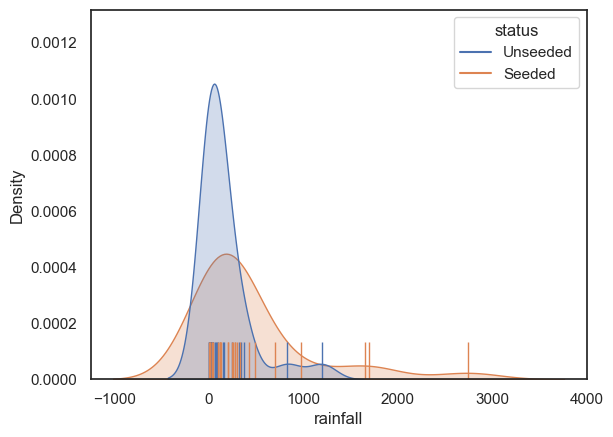

In [5]:
sns.kdeplot(data=clouds, x='rainfall', hue='status', shade=True)
sns.rugplot(data=clouds, x='rainfall', hue='status', height=0.1)
plt.show()

*c) Calculate the best fitting Normal distributions for seeded and unseeded clouds respectively and overlay a plot of the probability density functions (PDF) of these two normal distributions on the plot created in part (b)*

*Note- the best fitting normal distribution is a normal distribution that shares the same mean and standard deviation as the data sample – plotting of the normal PDF is covered in section 5.7 of the online course book*

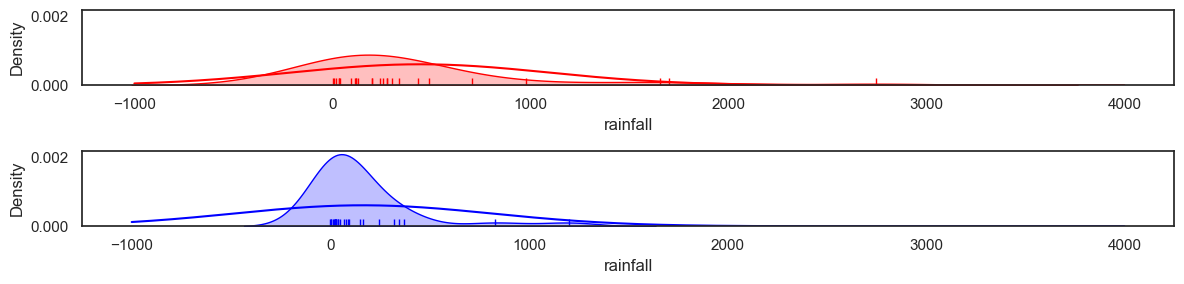

In [9]:
plt.figure(figsize=(12, 3))

seeded=clouds[clouds['status']=='Seeded']['rainfall']
unseeded=clouds[clouds['status']=='Unseeded']['rainfall']

# seeded clouds
plt.subplot(2,1,1)
x=range(-1000,4000)
y = stats.norm.pdf(x,seeded.mean(),seeded.std())
plt.plot(x,y,color=(1,0,0))
sns.kdeplot(data=seeded, color=[1,0,0], shade=True)
sns.rugplot(data=seeded, color=[1,0,0], height=0.1)
plt.ylim([0,0.0022])

# unseeded clouds
plt.subplot(2,1,2)
x=range(-1000,4000)
y = stats.norm.pdf(x,unseeded.mean(),seeded.std())
plt.plot(x,y,color=(0,0,1))
sns.kdeplot(data=unseeded, color=[0,0,1], shade=True)
sns.rugplot(data=unseeded, color=[0,0,1], height=0.1)
plt.ylim([0,0.0022])

plt.tight_layout()
plt.show()

*d)	Based on the plot in part (c), the data are not well fitted by a normal distribution. Comment on the what you can see in the graph that suggests the normal distribution is a poor fit.*

The mean of the fitted normal seems to fall above almmost all the datapoints in each sample.

The long tail of high rainfall events (positive skew) is not fitted by the normal which is necessarily symetrical

The best fitting normal assigns a lot of probability mass to rainfall values below zero (to be fair the KDE plot also does this!)

*e) Conduct three statistical tests of the researcher’s hypothesis, based on*

*I.	Assumption of normality*

*II.	Permutation*

*III.	Ranked values*

*… in each case you should:*
* State the null and alternative hypothesis and the alpha value
* Report appropriate descriptive statistics for the test in question
* Carry out the test
* State the results of the test including the test statistic and p value. For the t-test, degrees of freedom should also be stated.
* Report your practical conclusion in plain English



#### I. Independent samples t-test

$\mathcal{H_o}:$ There is no difference in mean rainfall between seeded and unseeded clouds

$\mathcal{H_a}:$ The mean rainfall is higher for seeded clouds
    
I will test at the 5% level, one tailed

In [13]:
# output the relevant descriptive statistics
clouds.groupby('status').agg({'rainfall':['mean', 'std', 'count']})

rainfall                  
                mean         std count
status                                
Seeded    441.984615  650.787171    26
Unseeded  164.588462  278.426404    26

The mean rainfall is higher for seeded clouds (mean = 441.98 standard units, s.d. = 650.78) than for unseeded clouds (mean = 164.59 standard units, s.d. = 278.42) 

In [14]:
stats.ttest_ind(seeded,unseeded,alternative='greater')

Ttest_indResult(statistic=1.9982446280649688, pvalue=0.025571601199239034)

Rainfall was significantly higher for seeded clouds (t(50)=2.00, p=0.0256 one-tailed).

We conclude that cloud seeding increases rainfall.

#### II. Permutation test for difference of means (independent samples)

$\mathcal{H_o}:$ There is no difference in mean rainfall between seeded and unseeded clouds

$\mathcal{H_a}:$ The mean rainfall is higher for seeded clouds
    
I will test at the 5% level, one tailed

In [ ]:
# output the relevant descriptive statistics
clouds.groupby('status').agg({'rainfall':['mean', 'std', 'count']})

The mean rainfall is higher for seeded clouds (mean = 441.98 standard units, s.d. = 650.78) than for unseeded clouds (mean = 164.59 standard units, s.d. = 278.42) 

In [43]:
# define a function for difference of means in the suitalbe formmat for stats.permutation_test()
# note the difference between this function and mDiff for paired samples below!
def dMeans(x, y):
    return np.mean(x)-np.mean(y)

stats.permutation_test((seeded,unseeded),dMeans,permutation_type='independent',alternative='greater')

PermutationTestResult(statistic=277.3961538461539, pvalue=0.0214, null_distribution=array([ -83.72692308,  107.25      , -142.55      , ...,   74.23461538,
        179.68846154,  178.81153846]))

Rainfall was significantly higher for seeded clouds (difference of means = 277.40, df = 50, p=0.0206 one-tailed).

We conclude that cloud seeding increases rainfall.

Note - the degrees of freedom for this test are 50 (52 datapoints - 2 estimated means for each shuffle; However I don't necessarily expect students to work this out as I haven't really explained it; it would be fine to just report sample sizes instead for the permutation test)

III. Rank sum test

$\mathcal{H_o}:$ There is no difference in median rainfall between seeded and unseeded clouds

$\mathcal{H_a}:$ The median rainfall is higher for seeded clouds

I will test at the 5% level, one tailed

In [22]:
# output the relevant descriptive statistics
clouds.groupby('status').quantile([0.25,0.5,0.75])

rainfall
status                 
Seeded   0.25    98.125
         0.50   221.600
         0.75   406.025
Unseeded 0.25    24.825
         0.50    44.200
         0.75   159.200

The median rainfall is higher for seeded clouds (median = 221.60 standard units, q1=98.13, q3=406.03) than for unseeded clouds (median = 44.20 standard units, q1=24.825, q3=159.20) 

In [23]:
stats.mannwhitneyu(seeded,unseeded,alternative='greater')

MannwhitneyuResult(statistic=473.0, pvalue=0.0069156486351175175)

A rank sum test shows that the median rainfall is significantly higher for seeded clouds (R=473.0, n1,n2=26, p=0.00692)

We conclude that cloud seeding does indeed increase rainfall

Note - I think students should report the sample sizes for rank based tests so that the reader knows how many data points the inference was based on, and also because the test statistic R is uninterpretable without the sample sizes; some stats packages convert the test statistic R to a Z score which would be nice but statsmodels doesn't do that.

*f) Comment on the relative merits of each possible choice of test for this dataset.*

I would choose the permutation test. The t-test is clearly not appropriate due to the non-normal data distribution. Ranking of the data downplays the role of the extreme rainfall events which, though rare, are of significant practical importance.

Note - Students may prefer the rank sum test ot permutation, for example if they regard the extreme rainfall events as outliers not to be trusted. I am fine with taht answer as long as coherently justified.

## Question 2: Colouring books

*A researcher hypothesises that working on adult colouring books is particularly relaxing and will lower resting heart rate.*

*She measures resting heart rate after one hour of colouring and after one hour of reading a novel in the same participants. The data are provided in the file ColouringHeartRate.csv. These are made-up data.*

*a)	Download the data file and load the data into a Pandas dataframe called colouring*


In [29]:
heartRate = pandas.read_csv('data/ColouringHeartRate.csv')
heartRate

,participantID,colouring,reading
0,a,62,71
1,b,66,71
2,c,61,69
3,d,68,61
4,e,74,75
5,f,62,71
6,g,68,77
7,h,62,72
8,i,55,62
9,j,59,65


*b) Plot the data and comment.*

As the data are paired I will make a scatterplot; I plot the line x=y for reference

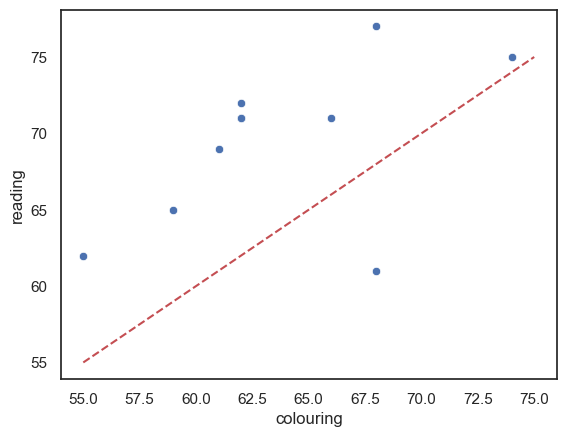

In [33]:
sns.scatterplot(data=heartRate, x='colouring', y='reading')
plt.plot([55,75],[55,75],'r--')

There appears to be a positive correlation (people with high heart rates in one condition also have high heart rates in the other condition)

Almost all the participants have a higher heart rate in the reading condition (points lie above the line x=y)

*c)	This is a within-subjects or repeated-measures design. Explain what a within-subjects design is and what its advantages are. With reference to your graph, explain the advantages of a within-subjects design in this particular experiment.*

A within subjects design is one in which each participant completes mmultiple conditions, so each person can be compared to themself arcoss conditions. The advantage is that all interpersonal confounding variables are cancelled out. 

In the current study, we see that there are large idividual differences in heart rate, meaning that people with high heart rate in the colouring condition also have a high heart rate in the reading condition; the change in heart rate between conditions is relatively small an could be dwarfed by these individual differences in a between-subjects design.

A possible disadvantage is order effects - in the current example, if the colouring condition is always completed second, people could have a lower heart rate due to being more relaxed on the second visit to the lab.


*d) Why do you think the researcher chose to compare heart rate after one hour of colouring to heart rate after one hour of reading, as opposed to comparing heart rate before and after colouring?*

To avoid order effects within a session - eg heart rate likely to be higher when the participant just arrived (from walking/cycling, plus possible nerves in the lab situation) than at the end of the session.

*e)	Conduct three statistical tests of the researcher’s hypothesis, based on* 

*I.	Assumption of normality*

*II.	Permutation*

*III.	Ranked values*

*… in each case you should:*

* State the null and alternative hypothesis and the alpha value
* Report appropriate descriptive statistics for the test in question
* Carry out the test
* State the results of the test including the test statistic and p value. For the t-test, degrees of freedom should also be stated.
* Report your practical conclusion in plain English


#### I. Paired samples t-test

$\mathcal{H_o}:$ There is no difference in mean heart rate between reading and colouring conditions

$\mathcal{H_a}:$ The mean heartrate is lower in the colouring condition
    
I will test at the 5% level, one tailed

In [36]:
# output the relevant descriptive statistics
heartRate.agg({'colouring':['mean', 'std', 'count'], 'reading':['mean', 'std', 'count']})

,colouring,reading
mean,63.700000,69.40000
std,5.396501,5.25357
count,10.000000,10.00000


The mean heart rate is lower after colouring (mean = 67.3 bpm, s.d. = 5.40) than after reading (mean = 69.4 bpm, s.d. = 5.25) 

In [38]:
stats.ttest_rel(heartRate['reading'], heartRate['colouring'], alternative='greater')

TtestResult(statistic=3.4753513368432465, pvalue=0.0034947821057590726, df=9)

A paired samples t-test showed that there was a significant difference such that heart rate was lower after colouring than reading (t(9)=3.48, p=0.00349)

We conclude that colouring is a successful intervention to lower heart rate, compared to reading.

#### II. Permutation test for difference of means: paired samples

$\mathcal{H_o}:$ There is no difference in mean heart rate between reading and colouring conditions

$\mathcal{H_a}:$ The mean heartrate is lower in the colouring condition
    
I will test at the 5% level, one tailed

In [40]:
# output the relevant descriptive statistics
heartRate.agg({'colouring':['mean', 'std', 'count'], 'reading':['mean', 'std', 'count']})

,colouring,reading
mean,63.700000,69.40000
std,5.396501,5.25357
count,10.000000,10.00000


The mean heart rate is lower after colouring (mean = 67.3 bpm, s.d. = 5.40) than after reading (mean = 69.4 bpm, s.d. = 5.25)


In [42]:
# note the difference between this function and dMeans for independent sammples above!)
def mDiff(x,y):
    return np.mean(x-y)

stats.permutation_test((heartRate['reading'], heartRate['colouring']), mDiff, permutation_type='samples', alternative='greater')

PermutationTestResult(statistic=5.7, pvalue=0.0078125, null_distribution=array([ 5.7,  4.5,  4.3, ..., -4.3, -4.5, -5.7]))

A permutation test for paired samples showed a significant difference of means such that heart rate was lower after colouring than reading (mean difference in heart rate 5.7 bpm, p=0.0000781, df = 9).

Note - the degrees of freedom for this test are 9 (10 pairs - 1 mean difference for each shuffle); However I don't necessarily expect students to work this out as I haven't really explained it; it would be fine to just report sample sizes instead for the permutation test). However students should be aware that the relevant sample size here for statistical purposes is 10 (number of pairs) not 20 (number of measurements).

#### III. Sign rank test

$\mathcal{H_o}:$ There is no difference in median heart rate between reading and colouring conditions

$\mathcal{H_a}:$ The median heartrate is lower in the colouring condition
    
I will test at the 5% level, one tailed

In [45]:
# output the relevant descriptive statistics
heartRate.quantile([0.25,0.5,0.75])

,colouring,reading
0.25,61.25,66.00
0.50,62.00,71.00
0.75,67.50,71.75


The median heart rate is lower after colouring (median = 62.00 bpm, q1=61.25, q3=67.50) than after reading (median = 71.0 bpm, q1=66.0, q3=71.75) 

In [46]:
stats.wilcoxon(heartRate['reading'],heartRate['colouring'],alternative='greater')

WilcoxonResult(statistic=50.5, pvalue=0.009765625)

A sign rank test showed that heart rates were significantly lower after colouring than reading (T=50.5, p=0.00976, n=10 pairs).

We conclude that colouring is effective in lowering heart, rate compared to reading.

*f) The use of the t-test rests on an assumption of normality. What exactly must be normally distributed for the t-test to be valid in this case?*

The differences in heart rate would have to be normmally distriubted. Let's check if that is the case

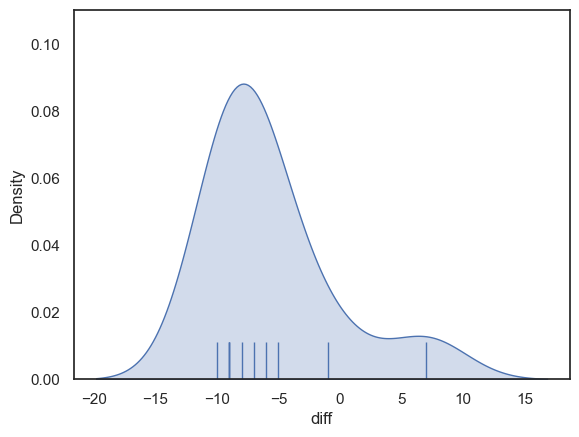

In [50]:
heartRate['diff']=heartRate['colouring']-heartRate['reading']
sns.kdeplot(heartRate['diff'], shade=True)
sns.rugplot(heartRate['diff'], height=0.1)
plt.show()

It seems not - the differences have a distribution with positive skew (to be fair the sample size is too small to be really confident abbout this, but if unsure, it is better to avoid assuming normality)

Note-  I wouldn't expect students to produce this plot unless explicitly asked, which they wer enot in the question abbove - I include it for interest/completelness

*g) Which statistical test do you think was the best choice for this dataset?*

I would choose the permutation test.

The t-test is not valid (assumption of normality not met as per my graph above; or even without the graph we could say that with a tiny sample size and no a priori reason to this the differences should be normal, we cannot assume normality)

The sign rank test is less powerful than the permutation test as it uses less information

Note - students may make another choice; for example they may prefer the sign rank test as there is one outlier difference; this is OK as long as there is a coherent justification. I am less keen on students choosing the t-test as with the small sample, and lack of a priori reason to this the data should be normal, the assumption of normality is hard to justify.

## Question 3: Reaction times

*Two participants, A and B, perform a choice reaction time task in which they must press one of two buttons depending on whether a word was a real or made-up word*

*The data are provided in the file ChoiceRTs.csv. These are made-up data*

*a) Download the data file and load the data into a Pandas dataframe called ChoiceRTs*

In [101]:
ChoiceRTs = pandas.read_csv('data/ChoiceRTs.csv')

*b) Plot the data for each participant in a way that illustrates the distribution of reaction times for each person and allows them to be compared. Two subplots within a single figure would be a good choice here.*

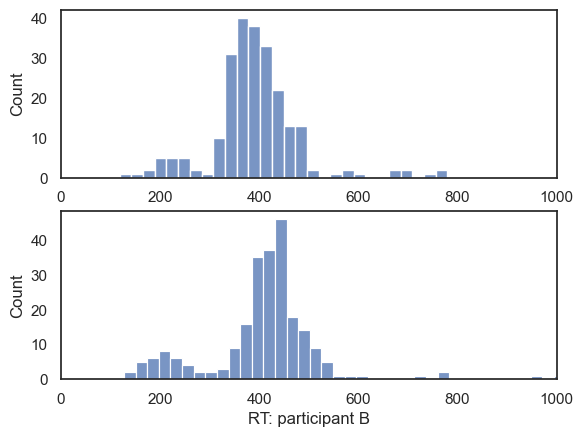

In [102]:
plt.subplot(2,1,1)
sns.histplot(data=ChoiceRTs, x='A')
plt.xlim([0,1000])
plt.xlabel('RT: participant A')

plt.subplot(2,1,2)
sns.histplot(data=ChoiceRTs, x='B')
plt.xlim([0,1000])
plt.xlabel('RT: participant B')

plt.tight_layout
plt.show()

Note - two plots placed vertically allow for better comparison than horizontally
X axes ranges should match to allow for direct comparison of the distributions
KDE plot would also be fine here

*c) Comment on how the distributions differ between conditions, and in what respect they are the same across conditions*

Both participants have a multimomdal distribution with the bulk of RTs grouped around 400 ms, but a smaller group of fast RTs (around 200ms) and a few slow RTs (>600 ms)

Participant B seems to be slightly slower in the 'main' distribution of RTs aroung 400ms, and also has a higher number of very fast RTs.

*The researcher decides that reaction times under 300ms (very fast responses) and over 700ms (very slow responses) should be excluded.*

*d) Do you think this is justified? Explain your answer.*

Yes, the RTs below 300ms clearly belong to a separate distribution from the bulk of RTs - maybe they represent false starts. The RTs above 700mms also seem to be outliers (maybe missed trials)

*e)	Find the mean and standard deviation of reaction time for each condition of the experiment, using*

I.	all the data 

II.	the data with RTs outside the range 300-700ms excluded

*Comment on the difference in results between cases I and II*


In [103]:
# create a new dataframe with fast and slow RTs replaced by NaN
ChoiceRTs_clean = ChoiceRTs.copy()

ChoiceRTs_clean.loc[(ChoiceRTs_clean['A']<300),['A']]=np.nan
ChoiceRTs_clean.loc[(ChoiceRTs_clean['A']>700),['A']]=np.nan
ChoiceRTs_clean.loc[(ChoiceRTs_clean['B']<300),['B']]=np.nan
ChoiceRTs_clean.loc[(ChoiceRTs_clean['B']>700),['B']]=np.nan

In [105]:
ChoiceRTs.agg({'A':['mean', 'std', 'count'],'B':['mean', 'std', 'count']})

,A,B
mean,391.915404,407.901106
std,92.417086,114.115202
count,235.000000,235.000000


In [104]:
ChoiceRTs_clean.agg({'A':['mean', 'std', 'count'],'B':['mean', 'std', 'count']})

,A,B
mean,401.752356,431.175663
std,57.575202,49.184896
count,208.000000,196.000000


* f) For each of the two cases

*I.	all the data *

*II. the data with RTs outside the range 300-700ms excluded*

*…Conduct a t test to determine whether there is a difference in the mean reaction time between the two participants. *


In [95]:
# all the data
stats.ttest_ind(ChoiceRTs.A, ChoiceRTs.B, alternative='two-sided', nan_policy='omit')

Ttest_indResult(statistic=-5.321100617211454, pvalue=1.8573862506275612e-07)

In [96]:
# data with extreme values excluded
stats.ttest_ind(ChoiceRTs_clean.A, ChoiceRTs_clean.B, alternative='two-sided', nan_policy='omit')

Ttest_indResult(statistic=-5.321100617211454, pvalue=1.8573862506275612e-07)

Note - we need to add the argument nan_policy='omit' otherwise the function ttest_ind returns a nan when there are nans in the dataset

Comments - we get a more significant difference when the extreme RTs are omitted. This is because removing extreme values reduces the standard deviation $s$, and thus the standard error of the mean for each sample.